In [1]:
import jax.numpy as jnp
import jax

import matplotlib.pyplot as plt

In [2]:
def get_changepoint_matrix(T, S):
    step = T/(S+1)
    s = jnp.arange(start=0, stop=T, step=step).astype(int)[1:]
    f = jax.vmap(lambda x: jnp.where(jnp.arange(T) >= x, jnp.ones(T), jnp.zeros(T)), 0, 0)
    A = f(s).T
    return A, s

print(get_changepoint_matrix(10, 2))

(DeviceArray([[0., 0.],
             [0., 0.],
             [0., 0.],
             [1., 0.],
             [1., 0.],
             [1., 0.],
             [1., 1.],
             [1., 1.],
             [1., 1.],
             [1., 1.]], dtype=float32), DeviceArray([3, 6], dtype=int32))


In [3]:
k = 0
ro = jnp.array([1,-2])
A, s = get_changepoint_matrix(10, 2)

t = jnp.arange(10)
g1 = (k+A@ro)*t

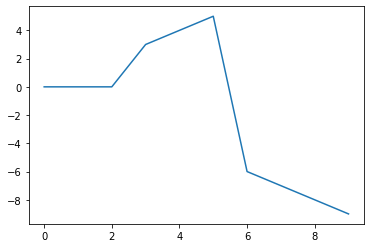

In [4]:
plt.plot(t, g1)
plt.show()

In [5]:
m = 0
gamma = A@(s*ro)

g2 = m+gamma

[ 0.  0.  0.  3.  4.  5. -6. -7. -8. -9.]
[ 0.  0.  0.  3.  3.  3. -9. -9. -9. -9.]
[  0.   0.   0.   6.   7.   8. -15. -16. -17. -18.]


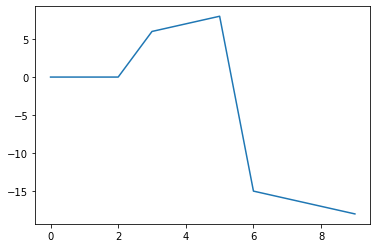

In [6]:
g = g1+g2
print(g1)
print(g2)
print(g)

plt.plot(t, g)
plt.show()

In [7]:
def get_trend(T, S, k, m, ro):
    A, s = get_changepoint_matrix(T, S)

    t = jnp.arange(T)
    g = (k+A@ro)*t + (m - A@(s*ro))
    return t, g

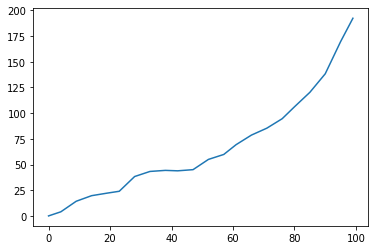

In [8]:
key = jax.random.PRNGKey(0)

x, y = get_trend(100, 20, 1, 0, jax.random.normal(key, (20,)))
plt.plot(x,y)
plt.show()